In [87]:
from pandas import read_csv
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'
df = read_csv(url, header=None)
print(df.shape)

(1372, 5)


In [88]:
print(df.describe())

                 0            1            2            3            4
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


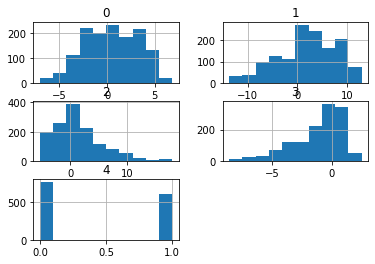

In [89]:
import matplotlib.pyplot as plt
df.hist()
plt.show()

In [90]:
X, y = df.values[:, :-1], df.values[:, -1]

In [70]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X = X.astype('float32')
y = le.fit_transform(y)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [73]:
from keras.models import Sequential
from keras.layers import Dense

In [82]:
n_features = X.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [83]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test,y_test))

In [85]:
from sklearn.metrics import accuracy_score

yhat = model.predict_classes(X_test)

score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.993


C:\Users\RASHMI\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


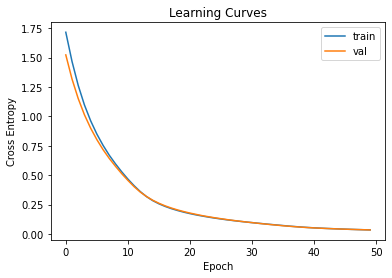

In [86]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [102]:
from sklearn.metrics import f1_score

In [105]:
print(f1_score(y_test, yhat, average='macro'))
print(f1_score(y_test, yhat, average='micro'))
print(f1_score(y_test, yhat, average='weighted'))
print(f1_score(y_test, yhat, average=None))
print(f1_score(y_test, yhat, zero_division=1))

0.9930925817682787
0.9933774834437086
0.9933805802010502
[0.99449541 0.99168975]
0.9916897506925207
